In [144]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import seaborn as sns
import tensorflow as tf

In [146]:
import data_visualisation as dv
import data_preprocessing as dp

In [147]:
os.chdir(r'C:\Users\nikitamarc.pomies\Desktop\KaggleChallenge')
print(os.getcwd())

C:\Users\nikitamarc.pomies\Desktop\KaggleChallenge


In [148]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

In [162]:
df=pd.read_csv('input/train.csv')
test=pd.read_csv('input/test.csv')

# Dataset view

In [150]:
df.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

**Check for unique values in each features**

In [152]:
df.nunique().sort_values(ascending=True)

failure               2
attribute_0           2
attribute_1           3
attribute_2           4
attribute_3           4
product_code          5
measurement_2        25
measurement_0        29
measurement_1        30
measurement_5      4671
measurement_4      4692
measurement_6      4704
measurement_9      4708
measurement_8      4713
measurement_3      4721
measurement_7      4734
measurement_13     5271
measurement_10     6177
measurement_14     6389
measurement_12     6392
measurement_11     6526
measurement_15     6577
measurement_16     7035
loading           11950
measurement_17    23612
id                26570
dtype: int64

**Checking for missing values for each features**



In [153]:
df.isnull().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

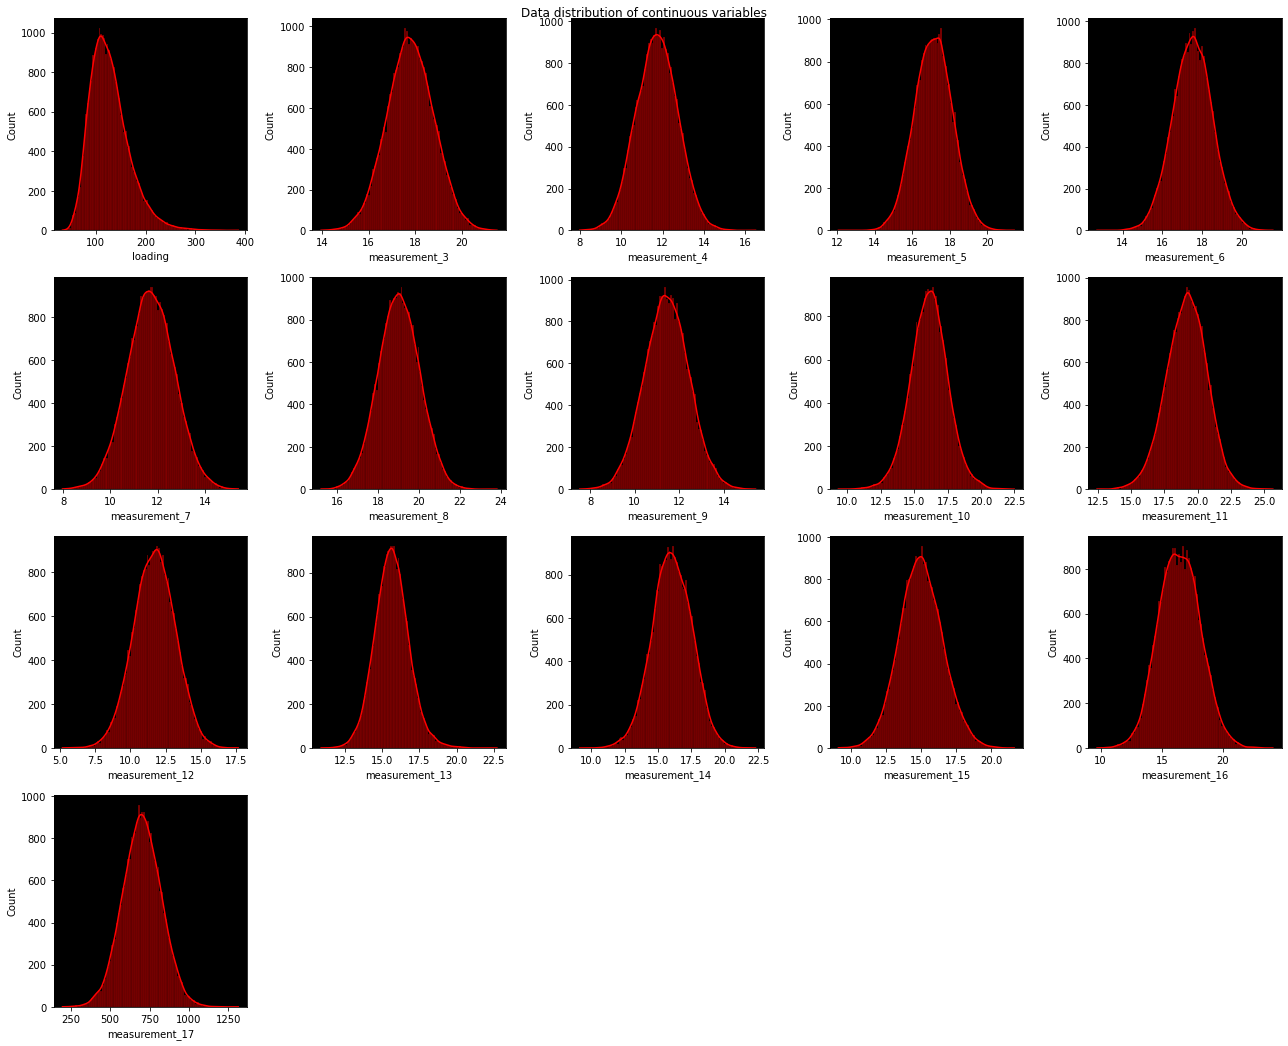

In [154]:
dv.check_data_distribution(df)

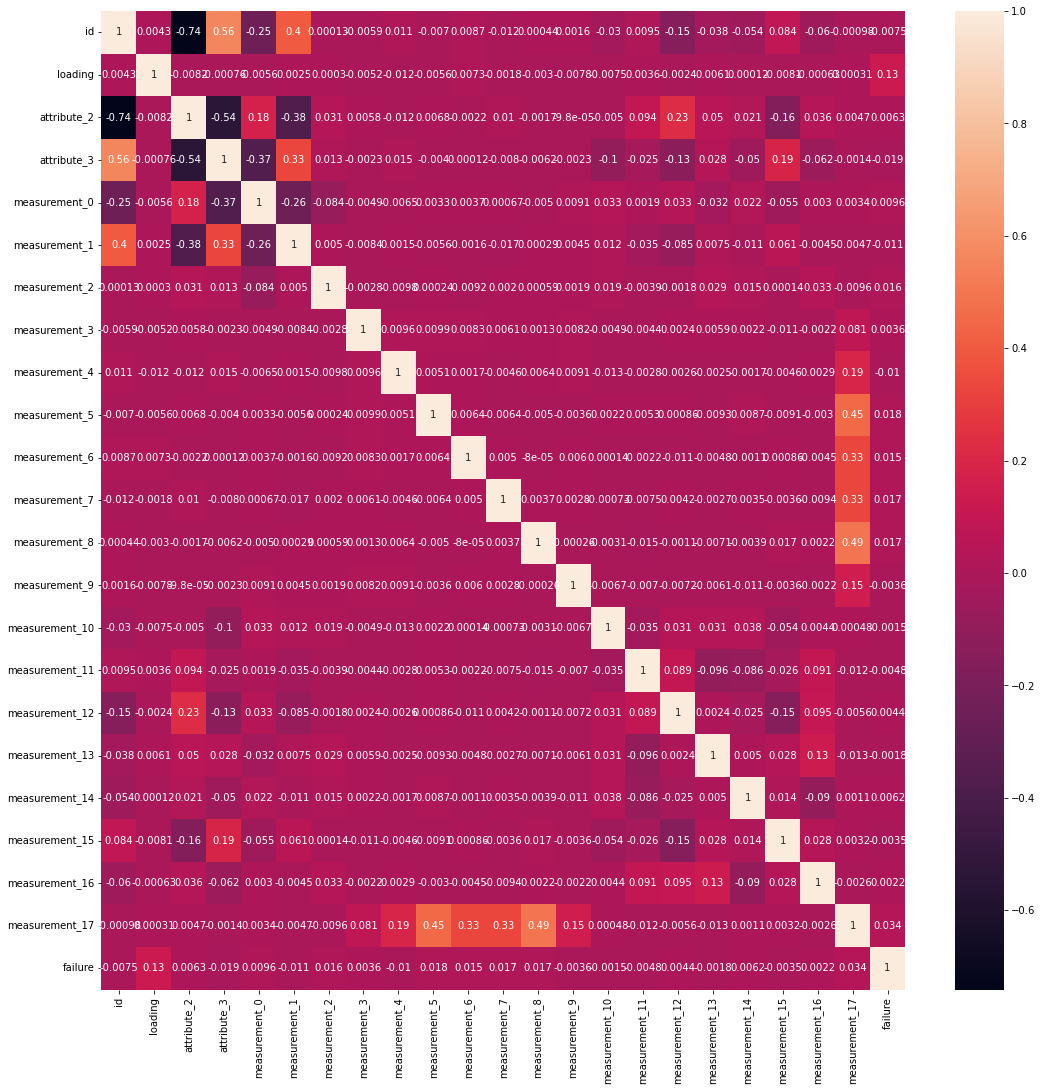

In [155]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True)
plt.show()

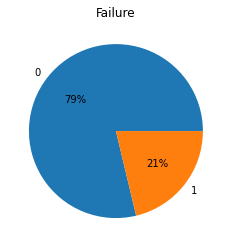

In [156]:
target_var=pd.crosstab(index=df['failure'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('Failure')
plt.show()

**Features Cleaning**

We remove the categorical features where the test and train dataset have different unique values.

In [163]:
limit = 30 # Anything with more than 50 unique values is considered a numerical feature.
cat_feat = [feat for feat in df.columns if df[feat].nunique() < limit and feat!= 'failure']
num_feat = [feat for feat in df.columns if feat not in cat_feat and feat!= 'failure']

dp.remove_unusable_features(df,test,cat_feat)

cat. features product_code takes different values in train and test set 
  -> product_code deleted 

['A' 'B' 'C' 'D' 'E'] ['F' 'G' 'H' 'I'] 

cat. features attribute_1 takes different values in train and test set 
  -> attribute_1 deleted 

['material_8' 'material_5' 'material_6'] ['material_6' 'material_7' 'material_5'] 

cat. features attribute_2 takes different values in train and test set 
  -> attribute_2 deleted 

[9 8 5 6] [6 9 7] 

cat. features attribute_3 takes different values in train and test set 
  -> attribute_3 deleted 

[5 8 6 9] [4 7 9 5] 

cat. features measurement_0 takes different values in train and test set 
  -> measurement_0 deleted 

[ 7 14 12 13  9 11  4 10  6  8 21 15 17 18 19 16  5 25  3  1 23 20 22  2
 26 24  0 29 27] [ 6 11  8 14 10 16  7 20  9  5  2 13  3  4 15 19 12 22 21 18 17 23  0 26
 24  1 25 29 30 28] 

cat. features measurement_2 takes different values in train and test set 
  -> measurement_2 deleted 

[ 4  3  5  6  8  0  7  2 10  9 15 12 11  1 

In [164]:


#Both the dataset have same unique values in each column.we will encode this feature as a binary valuable
df['attribute_0']=df['attribute_0'].map({'material_7':0,'material_5':1})
test['attribute_0']=test['attribute_0'].map({'material_7':0,'material_5':1})

**Modelling**

In [165]:
X_train=df.iloc[:,1:-1] #the last column is the target value, failure or not 
X_test=test.iloc[:,1:]
y_train=df.iloc[:,-1]

In [166]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train= knn_imputer.fit_transform(X_train)
X_test=knn_imputer.transform(X_test)

In [ ]:
import tensorflow as tf

In [125]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train,y_train,verbose=2,batch_size=256,epochs=500, validation_split = 0.2)

Epoch 1/500
84/84 - 1s - loss: 74.2105 - accuracy: 0.2140 - val_loss: 21.0339 - val_accuracy: 0.2072 - 547ms/epoch - 7ms/step
Epoch 2/500
84/84 - 0s - loss: 6.5069 - accuracy: 0.3524 - val_loss: 1.1790 - val_accuracy: 0.6517 - 114ms/epoch - 1ms/step
Epoch 3/500
84/84 - 0s - loss: 0.8945 - accuracy: 0.7207 - val_loss: 0.7950 - val_accuracy: 0.7452 - 117ms/epoch - 1ms/step
Epoch 4/500
84/84 - 0s - loss: 0.7330 - accuracy: 0.7578 - val_loss: 0.7117 - val_accuracy: 0.7667 - 118ms/epoch - 1ms/step
Epoch 5/500
84/84 - 0s - loss: 0.6807 - accuracy: 0.7694 - val_loss: 0.6732 - val_accuracy: 0.7759 - 131ms/epoch - 2ms/step
Epoch 6/500
84/84 - 0s - loss: 0.6527 - accuracy: 0.7750 - val_loss: 0.6489 - val_accuracy: 0.7808 - 130ms/epoch - 2ms/step
Epoch 7/500
84/84 - 0s - loss: 0.6337 - accuracy: 0.7788 - val_loss: 0.6306 - val_accuracy: 0.7845 - 128ms/epoch - 2ms/step
Epoch 8/500
84/84 - 0s - loss: 0.6195 - accuracy: 0.7810 - val_loss: 0.6161 - val_accuracy: 0.7847 - 133ms/epoch - 2ms/step
Epoch 

Epoch 67/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 108ms/epoch - 1ms/step
Epoch 68/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5108 - val_accuracy: 0.7926 - 110ms/epoch - 1ms/step
Epoch 69/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5108 - val_accuracy: 0.7926 - 107ms/epoch - 1ms/step
Epoch 70/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5108 - val_accuracy: 0.7926 - 109ms/epoch - 1ms/step
Epoch 71/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5108 - val_accuracy: 0.7926 - 110ms/epoch - 1ms/step
Epoch 72/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5108 - val_accuracy: 0.7926 - 109ms/epoch - 1ms/step
Epoch 73/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5108 - val_accuracy: 0.7926 - 109ms/epoch - 1ms/step
Epoch 74/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5108 - val_accuracy: 0.7926 - 106ms/epoch - 1ms/step


Epoch 133/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 133ms/epoch - 2ms/step
Epoch 134/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 130ms/epoch - 2ms/step
Epoch 135/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 109ms/epoch - 1ms/step
Epoch 136/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 125ms/epoch - 1ms/step
Epoch 137/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 133ms/epoch - 2ms/step
Epoch 138/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 112ms/epoch - 1ms/step
Epoch 139/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5106 - val_accuracy: 0.7926 - 111ms/epoch - 1ms/step
Epoch 140/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 109ms/epoch - 1

84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 138ms/epoch - 2ms/step
Epoch 199/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 116ms/epoch - 1ms/step
Epoch 200/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 129ms/epoch - 2ms/step
Epoch 201/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 134ms/epoch - 2ms/step
Epoch 202/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 123ms/epoch - 1ms/step
Epoch 203/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5106 - val_accuracy: 0.7926 - 133ms/epoch - 2ms/step
Epoch 204/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 116ms/epoch - 1ms/step
Epoch 205/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 112ms/epoch - 1ms/step
Epoch 

Epoch 264/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5108 - val_accuracy: 0.7926 - 108ms/epoch - 1ms/step
Epoch 265/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5108 - val_accuracy: 0.7926 - 110ms/epoch - 1ms/step
Epoch 266/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 111ms/epoch - 1ms/step
Epoch 267/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 109ms/epoch - 1ms/step
Epoch 268/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 111ms/epoch - 1ms/step
Epoch 269/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 118ms/epoch - 1ms/step
Epoch 270/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5106 - val_accuracy: 0.7926 - 113ms/epoch - 1ms/step
Epoch 271/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5106 - val_accuracy: 0.7926 - 109ms/epoch - 1

84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5106 - val_accuracy: 0.7926 - 113ms/epoch - 1ms/step
Epoch 330/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 108ms/epoch - 1ms/step
Epoch 331/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 108ms/epoch - 1ms/step
Epoch 332/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 110ms/epoch - 1ms/step
Epoch 333/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 124ms/epoch - 1ms/step
Epoch 334/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5106 - val_accuracy: 0.7926 - 111ms/epoch - 1ms/step
Epoch 335/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 109ms/epoch - 1ms/step
Epoch 336/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5106 - val_accuracy: 0.7926 - 123ms/epoch - 1ms/step
Epoch 

Epoch 395/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 122ms/epoch - 1ms/step
Epoch 396/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 121ms/epoch - 1ms/step
Epoch 397/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 113ms/epoch - 1ms/step
Epoch 398/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 114ms/epoch - 1ms/step
Epoch 399/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 115ms/epoch - 1ms/step
Epoch 400/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 117ms/epoch - 1ms/step
Epoch 401/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 114ms/epoch - 1ms/step
Epoch 402/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 113ms/epoch - 1

84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 116ms/epoch - 1ms/step
Epoch 461/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5106 - val_accuracy: 0.7926 - 114ms/epoch - 1ms/step
Epoch 462/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5106 - val_accuracy: 0.7926 - 120ms/epoch - 1ms/step
Epoch 463/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5106 - val_accuracy: 0.7926 - 112ms/epoch - 1ms/step
Epoch 464/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5106 - val_accuracy: 0.7926 - 132ms/epoch - 2ms/step
Epoch 465/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 130ms/epoch - 2ms/step
Epoch 466/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 113ms/epoch - 1ms/step
Epoch 467/500
84/84 - 0s - loss: 0.5192 - accuracy: 0.7860 - val_loss: 0.5107 - val_accuracy: 0.7926 - 115ms/epoch - 1ms/step
Epoch 